In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
X = df.drop('label', axis=1).to_numpy()
y = df['label'].to_numpy()

In [89]:
#reshape the X variable so it can fit our model. 
X = X.reshape(42000,28,28)
X.shape

(42000, 28, 28)

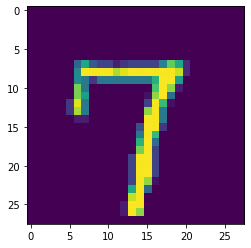

In [90]:
single_image= X[6]
single_image.shape
plt.imshow(single_image)

In [96]:
#scaling the X values
X.max()
X = X /255

In [99]:
#reshape the X variable so it can fit our model. batch_size, widht,height,color_channel
X = X.reshape(42000,28,28,1)
X.shape

(42000, 28, 28, 1)

In [102]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [104]:
##create categorical values for my output so that the model don't think it's continues variables and start comparing numbers
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

# Create model

In [160]:
model = Sequential()

In [161]:
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='Same', input_shape=(28,28,1))) 

In [150]:
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu') )

In [162]:
model.add(MaxPool2D(pool_size=(2,2)))

In [152]:
model.add(Dropout(0.25))

In [153]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [154]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 

In [155]:
model.add(MaxPool2D(pool_size=(2,2)))

In [156]:
model.add(Dropout(0.25))

In [163]:
model.add(Flatten())

In [164]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [165]:
#compile and train model, add a early_stop so that the model stop training when the validation data is not in line with train data.  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train_cat, 
          epochs=30, 
          validation_data=(X_test, y_test_cat), 
          callbacks=[early_stop])

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 18s 477us/sample - loss: 0.9461 - accuracy: 0.7058 - val_loss: 0.3956 - val_accuracy: 0.8883
Epoch 2/30
37800/37800 [==============================] - 18s 473us/sample - loss: 0.4029 - accuracy: 0.8775 - val_loss: 0.3015 - val_accuracy: 0.9100
Epoch 3/30
37800/37800 [==============================] - 18s 478us/sample - loss: 0.3323 - accuracy: 0.8994 - val_loss: 0.2488 - val_accuracy: 0.9243
Epoch 4/30
37800/37800 [==============================] - 19s 506us/sample - loss: 0.2916 - accuracy: 0.9115 - val_loss: 0.2215 - val_accuracy: 0.9336
Epoch 5/30
37800/37800 [==============================] - 19s 497us/sample - loss: 0.2626 - accuracy: 0.9221 - val_loss: 0.1985 - val_accuracy: 0.9398
Epoch 6/30
37800/37800 [==============================] - 19s 508us/sample - loss: 0.2419 - accuracy: 0.9275 - val_loss: 0.1837 - val_accuracy: 0.9488
Epoch 7/30
37800/37800 [=====================

# Evaluate the model

In [118]:
evaluate = pd.DataFrame(model.history.history)

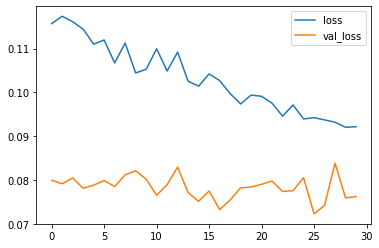

In [121]:
#loss
evaluate[['loss', 'val_loss']].plot()
plt.show()

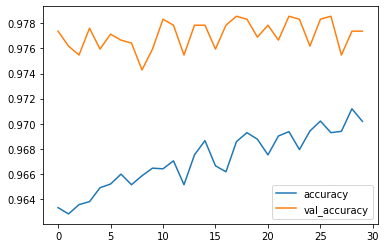

In [122]:
#accuracy
evaluate[['accuracy', 'val_accuracy']].plot()
plt.show()

# Prediction

In [123]:
#predict
y_pred = model.predict_classes(X_test)

In [124]:
#evaluate
classification = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(classification)
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.99      0.99      0.99       471
           2       0.96      0.99      0.97       420
           3       0.98      0.98      0.98       506
           4       0.98      0.98      0.98       397
           5       0.98      0.97      0.97       339
           6       0.98      0.98      0.98       402
           7       0.98      0.97      0.97       438
           8       0.96      0.97      0.96       403
           9       0.98      0.97      0.97       416

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200

[[402   0   1   0   0   1   2   1   1   0]
 [  0 466   3   0   0   0   1   1   0   0]
 [  0   1 414   0   2   0   0   1   2   0]
 [  0   0   4 494   0   3   0   2   1   2]
 [  0   0   0   0 389   0   3   1   0   4]
 [  0   0   0   4   0 328 

# Submission Kaggle

In [125]:
df_validate = pd.read_csv('test.csv')

In [126]:
X_valid = np.array(df_validate)
X_valid = X_valid.reshape(28000,28,28,1)
X_valid = X_valid/255

In [127]:
###Predict
prediction = model.predict_classes(X_valid)

In [128]:
#print to file
output = pd.DataFrame({'ImageId': list(df_validate.index.values+1) , 'Label': prediction})
output.to_csv('my_submission.csv', index=False)